### Goal: Analyzing User Behavior for Coupon Acceptance: Insights and Pattern

**Objective**

Objective of this project is to identify if a user would accept a coupon offered based on its attributes, such as age, direction, current time, weather, passenger, etc

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under USD20), coffee houses, carry out & take away, bar, and more expensive restaurants (USD20 - USD50).

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Step 1: Analyze Data

1. Read in the `coupons.csv` file.


In [367]:
data = pd.read_csv('data/coupons.csv')

2. Explore data


In [370]:
#Print top data rows
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [372]:
#Review the data
print(data.info())

#Review the numerical data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Investigate the dataset for missing or problematic data.

In [375]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

4. Dealing with missing data. For now, I would drop Bar, CoffeeHouse, CarryAway, 
RestaurantLessThan2 and R
Restaurant20To NaN values.
   I would replace the NaN car values to "UNKNOWN"        

In [378]:
data = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

data[['car']] = data[['car']].fillna('UNKNOWN')
data.isna().sum()
#Replace NaN car values with UNKNOWN


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

5. What proportion of the total observations chose to accept the coupon?



In [381]:
#print(data[['Y']].loc[data['Y'] == 0].count())
total_coupon = data[['Y']].count()
accepted_coupon = data[['Y']].loc[data['Y'] == 1].count()
print('accepted_coupon', accepted_coupon)
accepted = (accepted_coupon * 100/ total_coupon).values[0]
print(f"Proportion of the total observations chose to accept the coupon is {accepted: .2f} %"  )

#print(data[['Y']].groupby(['Y']).sum())

accepted_coupon Y    6877
dtype: int64
Proportion of the total observations chose to accept the coupon is  56.93 %


6. Let's use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Count')

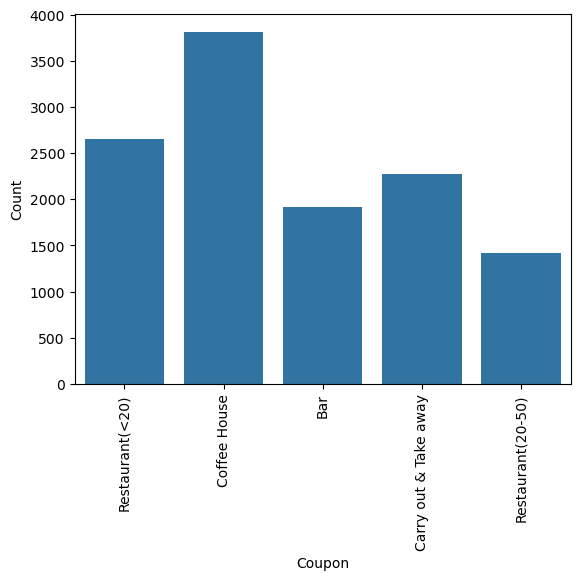

In [384]:
data[['coupon']].groupby(['coupon']).size()

sns.countplot(data=data, x='coupon')
plt.xticks(rotation=90)
plt.xlabel('Coupon')
plt.ylabel('Count')

7. Using a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

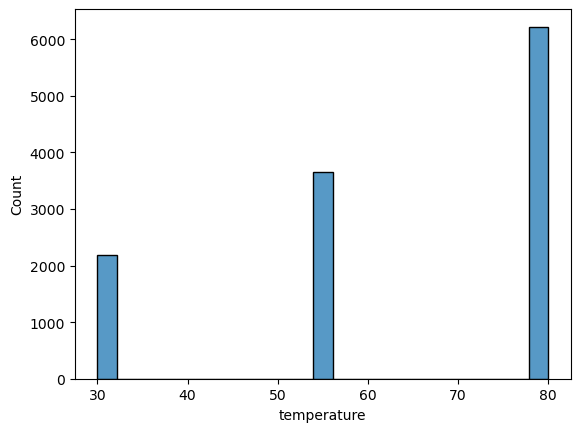

In [387]:
sns.histplot(data=data['temperature'])

*** Step 2: Build Hypothesis on the Coupon Approval

1. Create a new `DataFrame` that contains just the bar coupons.


In [390]:
print (data.groupby('coupon').size())
coupon_data = data[['coupon']]
coupon_data

coupon
Bar                      1913
Carry out & Take away    2280
Coffee House             3816
Restaurant(20-50)        1417
Restaurant(<20)          2653
dtype: int64


,coupon
22,Restaurant(<20)
23,Coffee House
24,Bar
25,Carry out & Take away
26,Coffee House
...,...
12679,Carry out & Take away
12680,Carry out & Take away
12681,Coffee House
12682,Bar


2. Let's examine What proportion of bar coupons were accepted?


In [393]:
accepted_bar_coupons = data.query('coupon == "Bar" & Y == 1' )[['coupon']].count()
all_bar_coupons = data.query('coupon == "Bar"' )[['coupon']].count()
#print('proportion of bar coupons were accepted:', (accepted_bar_coupons/all_bar_coupons).values[0])
#print((accepted_bar_coupons/all_bar_coupons).values[0])
print(f"Proportion of the total observations chose to accept the coupon is {(accepted_bar_coupons * 100/all_bar_coupons).values[0]: .2f} %"  )

Proportion of the total observations chose to accept the coupon is  41.19 %


3. Let's compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [396]:
# We need to fix few data values for age. There are string values in thuis field, such as below21 and 50plus
#Let's replace below21 with 20 and 50plus with 51 
data['age'] = data['age'].replace('below21', 20)
data['age'] = data['age'].replace('50plus', 51)
data['age'] = data['age'].astype(int)
data.groupby(['age']).size()

age
20     504
21    2537
26    2399
31    1925
36    1253
41    1065
46     664
51    1732
dtype: int64

In [398]:
#Let's calculate the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
acceptance_rate_3_or_fewer = data.query("(Bar == 'less1' | Bar == '1~3') & (Y == 1 & coupon == 'Bar')")[['Y']].count()
acceptance_rate_greater_than_3 = data.query("(Bar == '4~8' | Bar == 'gt8') & (Y == 1 & coupon == 'Bar')")[['Y']].count()
#acceptance_rate_greater_than_3 = data.query('Bar == ("4~8 | gt8)"').count()
#data[['Bar']].groupby(['Bar']).size()
ratio = (acceptance_rate_3_or_fewer/acceptance_rate_greater_than_3).values[0]
print(f"Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more is {ratio:.2f} "  )

Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more is 3.35 


4. Let's compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [401]:
acceptance_rate_bar_gt_monthplus_and_over_25 = data.query("( Bar == '1~3' | Bar == '4~8' | Bar == 'gt8') & (age > 25) & (Y == 1 & coupon == 'Bar')")[['Y']].count()
total_acceptance_rate = data.query("Y == 1 & coupon == 'Bar'")[['Y']].count()
ratio = (acceptance_rate_bar_gt_monthplus_and_over_25/total_acceptance_rate).values[0]
print(f"Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others is {ratio:.2f} "  )

Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others is 0.35 


5 .Let's compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [404]:

drivers_bars_gt_once_month = "( Bar == '1~3' | Bar == '4~8' | Bar == 'gt8')"
passengers_with_no_kid = "has_children == 0"
occupations_non_farming_fishing_forestry = "occupation != 'Farming Fishing & Forestry'"
accepted_coupons = "Y == 1 & coupon == 'Bar'"
#print (data.query(occupations_non_farming_fishing_forestry)[['occupation']].groupby('occupation').size())
acceptance_rate = data.query(drivers_bars_gt_once_month + " & " 
                             + passengers_with_no_kid + " & " + occupations_non_farming_fishing_forestry
                             + " & " + accepted_coupons) [['Y']].count()
print ()

print(f"Acceptance rate between drivers who go to a bar more than once a month"
      f" and are over the age of 25 to the all others is:"
      f" {(acceptance_rate /(data[['Y']].count())).values[0]:.2f} "  )



Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others is: 0.02 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



accepted_coupon_count_bar Y    788
dtype: int64
Acceptance rate for drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed is 35.91 %
Acceptance rate for drivers that go to bars more than once a month and are under the age of 30 is 29.95 %
Acceptance rate for drivers that go to cheap restaurants more than 4 times a month and income is less than 50K is 15.23 %


<Axes: xlabel='Acceptance Group', ylabel='Acceptance Rate %'>

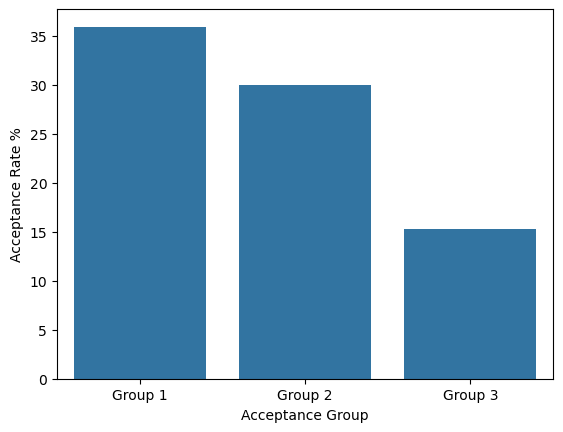

In [439]:
#######Condition 1: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed########
goes_to_bars_more_than_once_a_month = drivers_bars_gt_once_month
had_passengers_that_were_not_a_kid = passengers_with_no_kid
were_not_widowed = "maritalStatus != 'Widowed'"

boolean_string_1 = goes_to_bars_more_than_once_a_month  + " & " + had_passengers_that_were_not_a_kid + " & " +  were_not_widowed

#######Condition 2: Drivers who go to bars more than once a month and are under the age of 30########
under_the_age_of_30 = "age < 30"
boolean_string_2 = goes_to_bars_more_than_once_a_month  + " & " + under_the_age_of_30

#######Condition 3: Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K########
go_to_cheap_restaurants_more_than_4_times_a_month = "(RestaurantLessThan20 == '4~8' |RestaurantLessThan20 == 'gt8')"
income_is_less_than_50K = "(income == '$12500 - $24999' |  income == '$25000 - $37499' | income == '$37500 - $49999')"
boolean_string_3 = go_to_cheap_restaurants_more_than_4_times_a_month + " & " + income_is_less_than_50K


accepted_coupons = "Y == 1 & coupon == 'Bar'"
accepted_coupon_count_bar = data.query(accepted_coupons)[['Y']].count()
print(f"accepted_coupon_count_bar {accepted_coupon_count_bar}")

acceptance_count_1 = data.query(boolean_string_1 + " & " + accepted_coupons)[['Y']].count()

acceptance_rate_1 = (acceptance_count_1/(accepted_coupon_count_bar)).values[0]
print(f"Acceptance rate for drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed is {acceptance_rate_1 * 100:.2f} %"  )
#print(acceptance_rate_1)                               

acceptance_count_2 = data.query(boolean_string_2 + " & " + accepted_coupons)[['Y']].count()
acceptance_rate_2 = (acceptance_count_2/(accepted_coupon_count_bar)).values[0]
print(f"Acceptance rate for drivers that go to bars more than once a month and are under the age of 30 is {acceptance_rate_2 * 100:.2f} %"  )

query_string = boolean_string_3 + " & " + accepted_coupons
#print (query_string)
acceptance_count_3 = data.query(query_string)[['Y']].count()
acceptance_rate_3 = (acceptance_count_3/(accepted_coupon_count_bar)).values[0]
print(f"Acceptance rate for drivers that go to cheap restaurants more than 4 times a month and income is less than 50K is {acceptance_rate_3 * 100:.2f} %"  )

data_acceptance = {'Acceptance Group': ['Group 1', 'Group 2', 'Group 3'],
                   'Acceptance Rate %': [(acceptance_rate_1 * 100), (acceptance_rate_2 * 100), (acceptance_rate_3 * 100)]}
df = pd.DataFrame(data_acceptance)

sns.barplot(data= data_acceptance, x='Acceptance Group' , y='Acceptance Rate %')


#### 7. Observations #1: Coupon Acceptance for Bar
1. Acceptance rate for drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed is the highest at 35.91 %.
2. Acceptance rate for drivers that go to bars more than once a month and are under the age of 30 is second at 29.95 %.
3. Acceptance rate for drivers that go to cheap restaurants more than 4 times a month and income is less than 50K is third at 15.23 %..

## Further Investigation with other Coupon Codes, such as Coupon for 'Coffee House'


Let's investigate 3 groups:
1. go to Coffee House more than once a month, had passengers that were not a kid, and were not widowed OR2. 
go toCoffee Houses more than once a month and are under the age of 30 OR3. 
go to cheap restaurants more than 4 times a month and income is less than 50K.

accepted_coupon_count_bar Y    1894
dtype: int64
Acceptance rate for drivers that go to Coffee House more than once a month, had passengers that were not a kid, and were not widowed is 40.13 %
Acceptance rate for drivers that go to Coffee House more than once a month and are under the age of 30 is 34.27 %
Acceptance rate for drivers that go to cheap restaurants more than 4 times a month and income is less than 50K is 16.58 %


<Axes: xlabel='Acceptance Group', ylabel='Acceptance Rate %'>

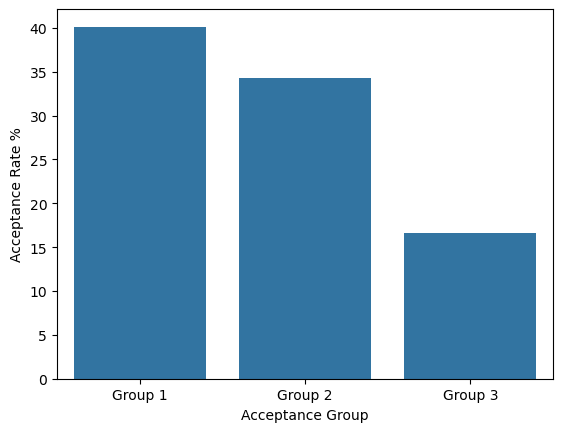

In [458]:
#######Condition 1: Drivers who go to Coffee House more than once a month, had passengers that were not a kid, and were not widowed########
goes_to_Coffee_House_more_than_once_a_month = "( CoffeeHouse  == '1~3' | CoffeeHouse == '4~8' | CoffeeHouse == 'gt8')"


had_passengers_that_were_not_a_kid = "has_children == 0"
were_not_widowed = "maritalStatus != 'Widowed'"

boolean_string_1 = goes_to_Coffee_House_more_than_once_a_month  + " & " + had_passengers_that_were_not_a_kid + " & " +  were_not_widowed

#######Condition 2: Drivers who go to Coffee House more than once a month and are under the age of 30########
under_the_age_of_30 = "age < 30"
boolean_string_2 = goes_to_Coffee_House_more_than_once_a_month  + " & " + under_the_age_of_30

#######Condition 3: Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K########
go_to_cheap_restaurants_more_than_4_times_a_month = "(RestaurantLessThan20 == '4~8' |RestaurantLessThan20 == 'gt8')"
income_is_less_than_50K = "(income == '$12500 - $24999' |  income == '$25000 - $37499' | income == '$37500 - $49999')"
boolean_string_3 = go_to_cheap_restaurants_more_than_4_times_a_month + " & " + income_is_less_than_50K


accepted_coupons = "Y == 1 & coupon == 'Coffee House'"
accepted_coupon_count_coffee_house = data.query(accepted_coupons)[['Y']].count()
print(f"accepted_coupon_count_bar {accepted_coupon_count_coffee_house}")

acceptance_count_1 = data.query(boolean_string_1 + " & " + accepted_coupons)[['Y']].count()

acceptance_rate_1 = (acceptance_count_1/(accepted_coupon_count_coffee_house)).values[0]
print(f"Acceptance rate for drivers that go to Coffee House more than once a month, had passengers that were not a kid, and were not widowed is {acceptance_rate_1 * 100:.2f} %"  )
#print(acceptance_rate_1)                               

acceptance_count_2 = data.query(boolean_string_2 + " & " + accepted_coupons)[['Y']].count()
acceptance_rate_2 = (acceptance_count_2/(accepted_coupon_count_coffee_house)).values[0]
print(f"Acceptance rate for drivers that go to Coffee House more than once a month and are under the age of 30 is {acceptance_rate_2 * 100:.2f} %"  )

query_string = boolean_string_3 + " & " + accepted_coupons
#print (query_string)
acceptance_count_3 = data.query(query_string)[['Y']].count()
acceptance_rate_3 = (acceptance_count_3/(accepted_coupon_count_coffee_house)).values[0]
print(f"Acceptance rate for drivers that go to cheap restaurants more than 4 times a month and income is less than 50K is {acceptance_rate_3 * 100:.2f} %"  )

data_acceptance = {'Acceptance Group': ['Group 1', 'Group 2', 'Group 3'],
                   'Acceptance Rate %': [(acceptance_rate_1 * 100), (acceptance_rate_2 * 100), (acceptance_rate_3 * 100)]}
df = pd.DataFrame(data_acceptance)

sns.barplot(data= data_acceptance, x='Acceptance Group' , y='Acceptance Rate %')

#### Observations: Coupon Acceptance for Coffee House
1.The highest acceptance rate is for drivers that go to Coffee House more than once a month, had passengers that were not a kid, and were not widowed is 40.13 %
2. 
Acceptance rate for drivers that go to Coffee House more than once a month and are under the age of 30 is 34.27  is second.
3. 
Acceptance rate for drivers that go to cheap restaurants more than 4 times a month and income is less than 50K is 16.58 is third. %%